In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import roc_curve,auc
# from sklearn import svm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
# from six import StringIO
# from IPython.display import Image
# import pydotplus
# from sklearn.tree import export_graphviz
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/HousingData.csv')
df                                       
                                        # CRIM - per capita crime rate by town
                                         #ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
                                        # INDUS - proportion of non-retail business acres per town.
                                        # CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
                                         #  NOX - nitric oxides concentration (parts per 10 million)
                                          #RM - average number of rooms per dwelling
                                       #AGE - proportion of owner-occupied units built prior to 1940
                                        # DIS - weighted distances to five Boston employment centres
                                        # RAD - index of accessibility to radial highways
                                         # TAX - full-value property-tax rate per $10,000
                                        # PTRATIO - pupil-teacher ratio by town
                                        # B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
                                      # LSTAT - % lower status of the population
                                       #MEDV - Median value of owner-occupied homes in $1000's 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.describe()             #describe displays summary of dataset.
                         #std is amount of variation of set of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df['CRIM'].fillna(value=df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(value=df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(value=df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(value=df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(value=df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(value=df['LSTAT'].mean(),inplace=True)

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

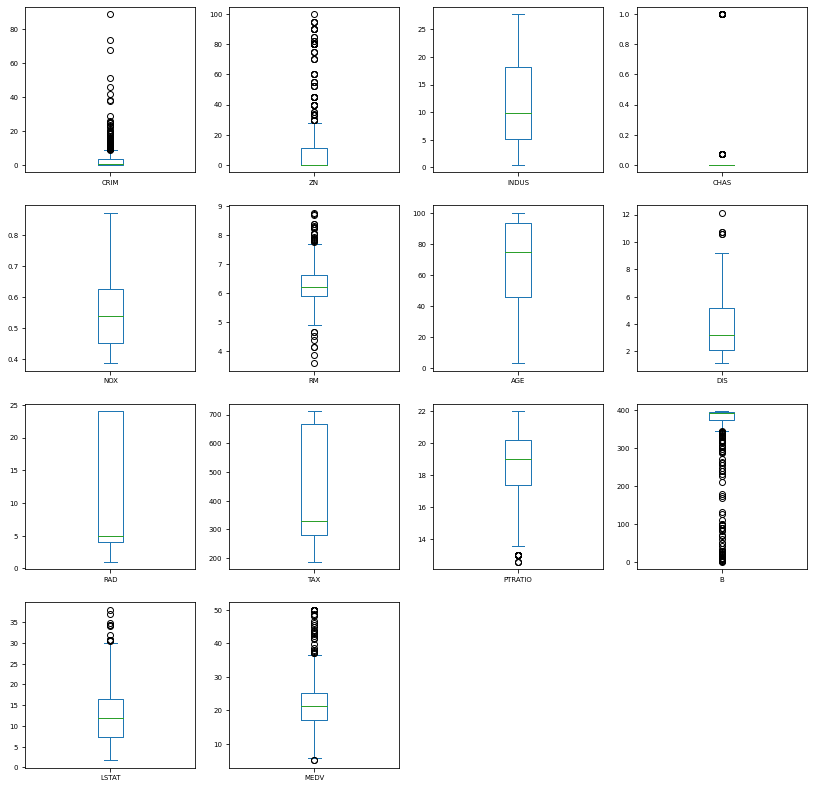

In [7]:
df.plot(kind='box',subplots=True,layout =(4,4),fontsize=7,figsize=(14,14));

In [8]:
df['CRIM'].describe() 
#An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.

count    506.000000
mean       3.611874
std        8.545770
min        0.006320
25%        0.083235
50%        0.290250
75%        3.611874
max       88.976200
Name: CRIM, dtype: float64

In [9]:
df.drop(df[df['CRIM']>3.6].index,axis=0,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [10]:
df['ZN'].describe() 

count    365.000000
mean      14.553707
std       25.415827
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      100.000000
Name: ZN, dtype: float64

In [11]:
df.drop(df[df['ZN']>20].index,axis=0,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [12]:
df['B'].describe()

count    278.000000
mean     377.781583
std       45.032530
min       70.800000
25%      381.490000
50%      392.350000
75%      396.120000
max      396.900000
Name: B, dtype: float64

In [13]:
df.drop(df[df['B']>396].index,axis=0,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0.000000,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.000000,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
5,0.02985,0.0,2.18,0.000000,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000,28.7
6,0.08829,12.5,7.87,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.430000,22.9
8,0.21124,12.5,7.87,0.000000,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.930000,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0.000000,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.070000,13.6
495,0.17899,0.0,9.69,0.000000,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.600000,23.1
499,0.17783,0.0,9.69,0.000000,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.100000,17.5
501,0.06263,0.0,11.93,0.000000,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,12.715432,22.4


In [14]:
df['MEDV'].describe()

count    206.000000
mean      24.057767
std        8.979767
min        7.000000
25%       18.650000
50%       22.000000
75%       26.475000
max       50.000000
Name: MEDV, dtype: float64

In [15]:
df.drop(df[df['MEDV']>50].index,axis=0,inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0.000000,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.000000,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
5,0.02985,0.0,2.18,0.000000,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.210000,28.7
6,0.08829,12.5,7.87,0.069959,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.430000,22.9
8,0.21124,12.5,7.87,0.000000,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.930000,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0.000000,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.070000,13.6
495,0.17899,0.0,9.69,0.000000,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.600000,23.1
499,0.17783,0.0,9.69,0.000000,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.100000,17.5
501,0.06263,0.0,11.93,0.000000,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,12.715432,22.4


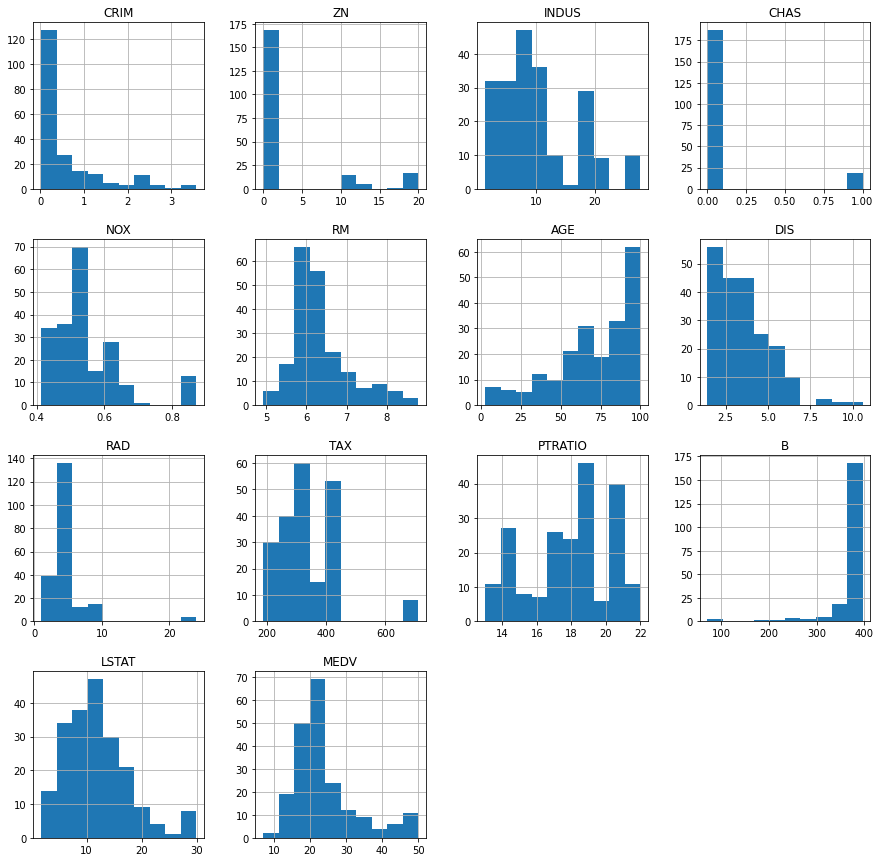

In [16]:
df.hist(figsize=(15,15));

<AxesSubplot:>

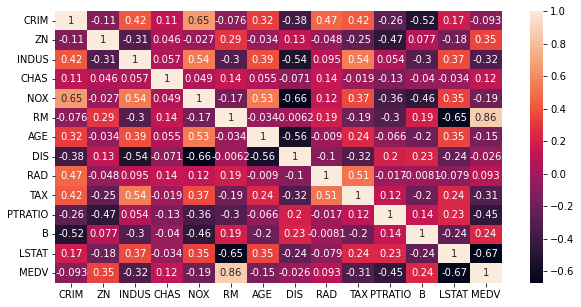

In [17]:
 #correlation between attributes
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot =True)

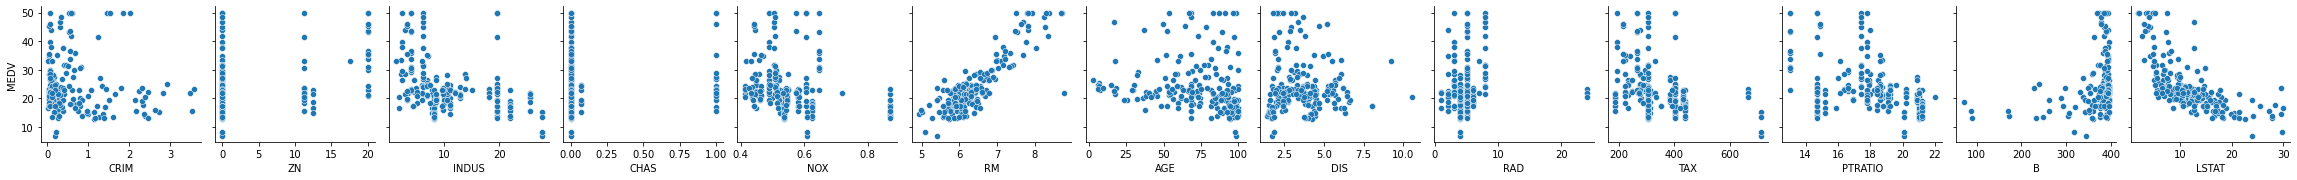

In [18]:
sns.pairplot(data=df,x_vars=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'],y_vars=['MEDV'])

In [19]:
# X=df[['RM','DIS','LSTAT']].values
# X=df[['RM','LSTAT','DIS'].values
# Y=df['MEDV'].values
X=df[['RM','LSTAT','DIS']].values
Y=df['MEDV'].values

In [20]:
X.shape

(206, 3)

In [21]:
X=df.iloc[:][['RM']]
X.shape

(206, 1)

In [22]:
y=df.iloc[:][['MEDV']]
y.shape

(206, 1)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [24]:
len(X_train)

164

In [25]:
len(X_test)

42

In [26]:
X_train

,RM
6,6.012
269,5.920
25,5.599
114,6.254
5,6.430
...,...
134,5.757
95,6.625
14,6.096
264,7.206


In [27]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

model1.fit(X_train,Y_train)

LinearRegression()

In [28]:
model1.predict(X_test)

array([23.22868368, 16.4085135 , 41.4881393 , 22.80500644, 32.34291111,
       19.808265  , 26.04975408, 25.37807065, 20.21127506, 24.25170921,
       17.40053826, 37.40637079,  9.30933636, 19.50859086, 18.69223715,
       25.98775253, 19.25025108, 19.07458003, 18.71290434, 22.22632534,
       20.00460323, 20.23194224, 19.08491362, 15.95383549, 17.31786953,
       23.70402888, 23.36302037, 34.18229034, 17.94821859, 22.42266357,
       44.14387224, 18.8679082 , 20.56261716, 44.94989235, 19.89093373,
       18.92990975, 18.76457229, 22.20565816, 14.7654725 , 30.55519983,
       19.04357925, 18.165224  ])

In [29]:
Y_test

array([24.1, 15.7, 37.6, 21.2, 37.9, 17.4, 29.4, 23.7, 24.3, 23. , 19.4,
       46. , 14.6, 18.8, 19.9, 16.5, 23.3, 20.6, 19.5, 21.2, 21.7, 13.6,
       20.4, 17.5, 13.1, 23.8, 21.4, 36. , 21.8, 21.7, 50. , 19.5, 22.5,
       50. , 13.2, 13.3, 20. , 14. , 15.2, 33.1, 19.3, 22.5])

In [30]:
model1.score(X_test,Y_test)

0.8241423999198534

In [31]:
#Random Forest
X1=df.iloc[:,:13].values

Y1=df.iloc[:,:-1].values


In [32]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.3, random_state = 4)


In [33]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor()
regr.fit(X1_train, Y1_train)

RandomForestRegressor()

In [34]:
y1_pred=regr.predict(X1_train)

In [35]:
regr.score(X1_test,Y1_test)

0.6132457785033314

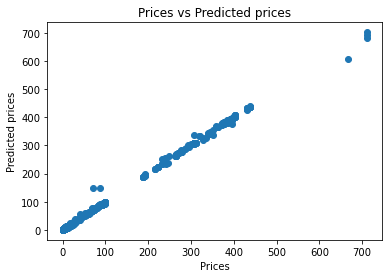

In [36]:
plt.scatter(Y1_train, y1_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()